In [1]:
import sys
sys.path.append('libs/')
from time_series import *
def create_path(path_to_create):
    if not os.path.exists(path_to_create):
            os.makedirs(path_to_create)

230217-17:18:49,719 nipype.utils WARNING:
	 A newer version (1.8.4) of nipy/nipype is available. You are using 1.7.0


In [21]:
fmridata=nib.load("/Data/home_data/Dieg_inverse_pipeline_7fev/F602/bold_datasink/corrected_bold/_scan_info_subject_idF602.session1_split_name_MAP6_rs-fMRI_mouse-2022_06_02_MAP6_rs-fMRI_mouse_F602_2-2022-06-02112647-8-T2_TurboRARE-BrukerRARE-001546_987_mrLinTrans_fslSwapDim-RAS_T2w/_run_None/MAP6_rs-fMRI_mouse-2022_06_02_MAP6_rs-fMRI_mouse_F602_2-2022-06-02112647-9-GE_EPI-BrukerEPI-003000_000_mrLinTrans_fslSwapDim-RAS_bold_combined.nii.gz")

In [5]:
brain_mask = nib.load("/Data/home_data/Dieg_inverse_pipeline_7fev/F602/bold_datasink/bold_brain_mask/_scan_info_subject_idF602.session1_split_name_MAP6_rs-fMRI_mouse-2022_06_02_MAP6_rs-fMRI_mouse_F602_2-2022-06-02112647-8-T2_TurboRARE-BrukerRARE-001546_987_mrLinTrans_fslSwapDim-RAS_T2w/_run_None/MAP6_rs-fMRI_mouse-2022_06_02_MAP6_rs-fMRI_mouse_F602_2-2022-06-02112647-9-GE_EPI-BrukerEPI-003000_000_mrLinTrans_fslSwapDim-RAS_bold_brain_mask.nii.gz")
anno_masks = nib.load("/run/user/1001/gvfs/smb-share:server=sum-gin-nas.u-ga.fr,share=gin_equipe_05/PROJECTS/Share/2022_mouse-rsfMRI/atlasesTemplates/p56_original_smallRegionsGrouped/4dAtlasForConnectivityMatrix/p56_smallRegionsGrouped_v4_leftRight_4D_resampled_template2CommonInverseWarpAffine_bold2AnatInverseWarpAffine.nii")
anno4d = apply_mask(anno_masks, brain_mask)

In [6]:
anno4d_bin = np.where(anno4d!=0,1,0)

In [22]:
fmridata_matrix = apply_mask(fmridata, brain_mask)

In [23]:
anno4d_bin.shape

(227, 16815)

In [26]:
Yinit.shape

(1800, 16815)

In [29]:
Ainit = np.copy(anno4d_bin)
Yinit = np.copy(fmridata_matrix)

In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [10]:
Yinit = np.load('../diego_datapath/files_for_alt_opt/Y_init.npy')
Ainit = np.load('../diego_datapath/files_for_alt_opt/A_init.npy')

In [30]:
def least_sqr(Y, A, mu_tikhonov):
    At = np.transpose(A)
    AA =  np.matmul( A, At) + mu_tikhonov * np.eye( A.shape[0] )
    tmp1 = np.linalg.inv( AA )
    tmp = np.matmul(Y,At)
    U_new = np.matmul(tmp,tmp1)
    return U_new
U = least_sqr(Yinit, Ainit, 1e-4)

In [47]:
labelscsv = pd.read_csv('/home/argheesh/Documents/diegs_tests/atlasTemplate/p56_original_smallRegionsGrouped/p56_smallRegionsGrouped_leftRight_idAndLabels_v4.txt', sep='\t', header=None)


In [44]:
labelscsv

,0,1
0,0,root
1,7,Frontal pole (R)
2,19,Somatomotor area (R)
3,45,Somatosensory area (R)
4,108,"Gustatory, Visceral and Auditive areas (R)"
...,...,...
224,3299,Third ventricle (L)
225,3300,Cerebral aqueduct (L)
226,3301,Fourth ventricle (L)
227,3302,Lateral recess (L)


In [45]:
cormat = np.corrcoef(U.T)
# labelscsv = pd.read_csv('/media/argheesh/DATAPART1/TempArgheesh/2021.12.31_DataFromHome/2021.12.29_Test_rs-fMRI_Mouse/Atlas-template/annoVolume+2000_rsfMRI.nii.csv', sep='\t', header=None)
col_one_list = labelscsv[0].tolist()
col_two_list = labelscsv[1].tolist()

/home/argheesh/software/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/argheesh/software/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


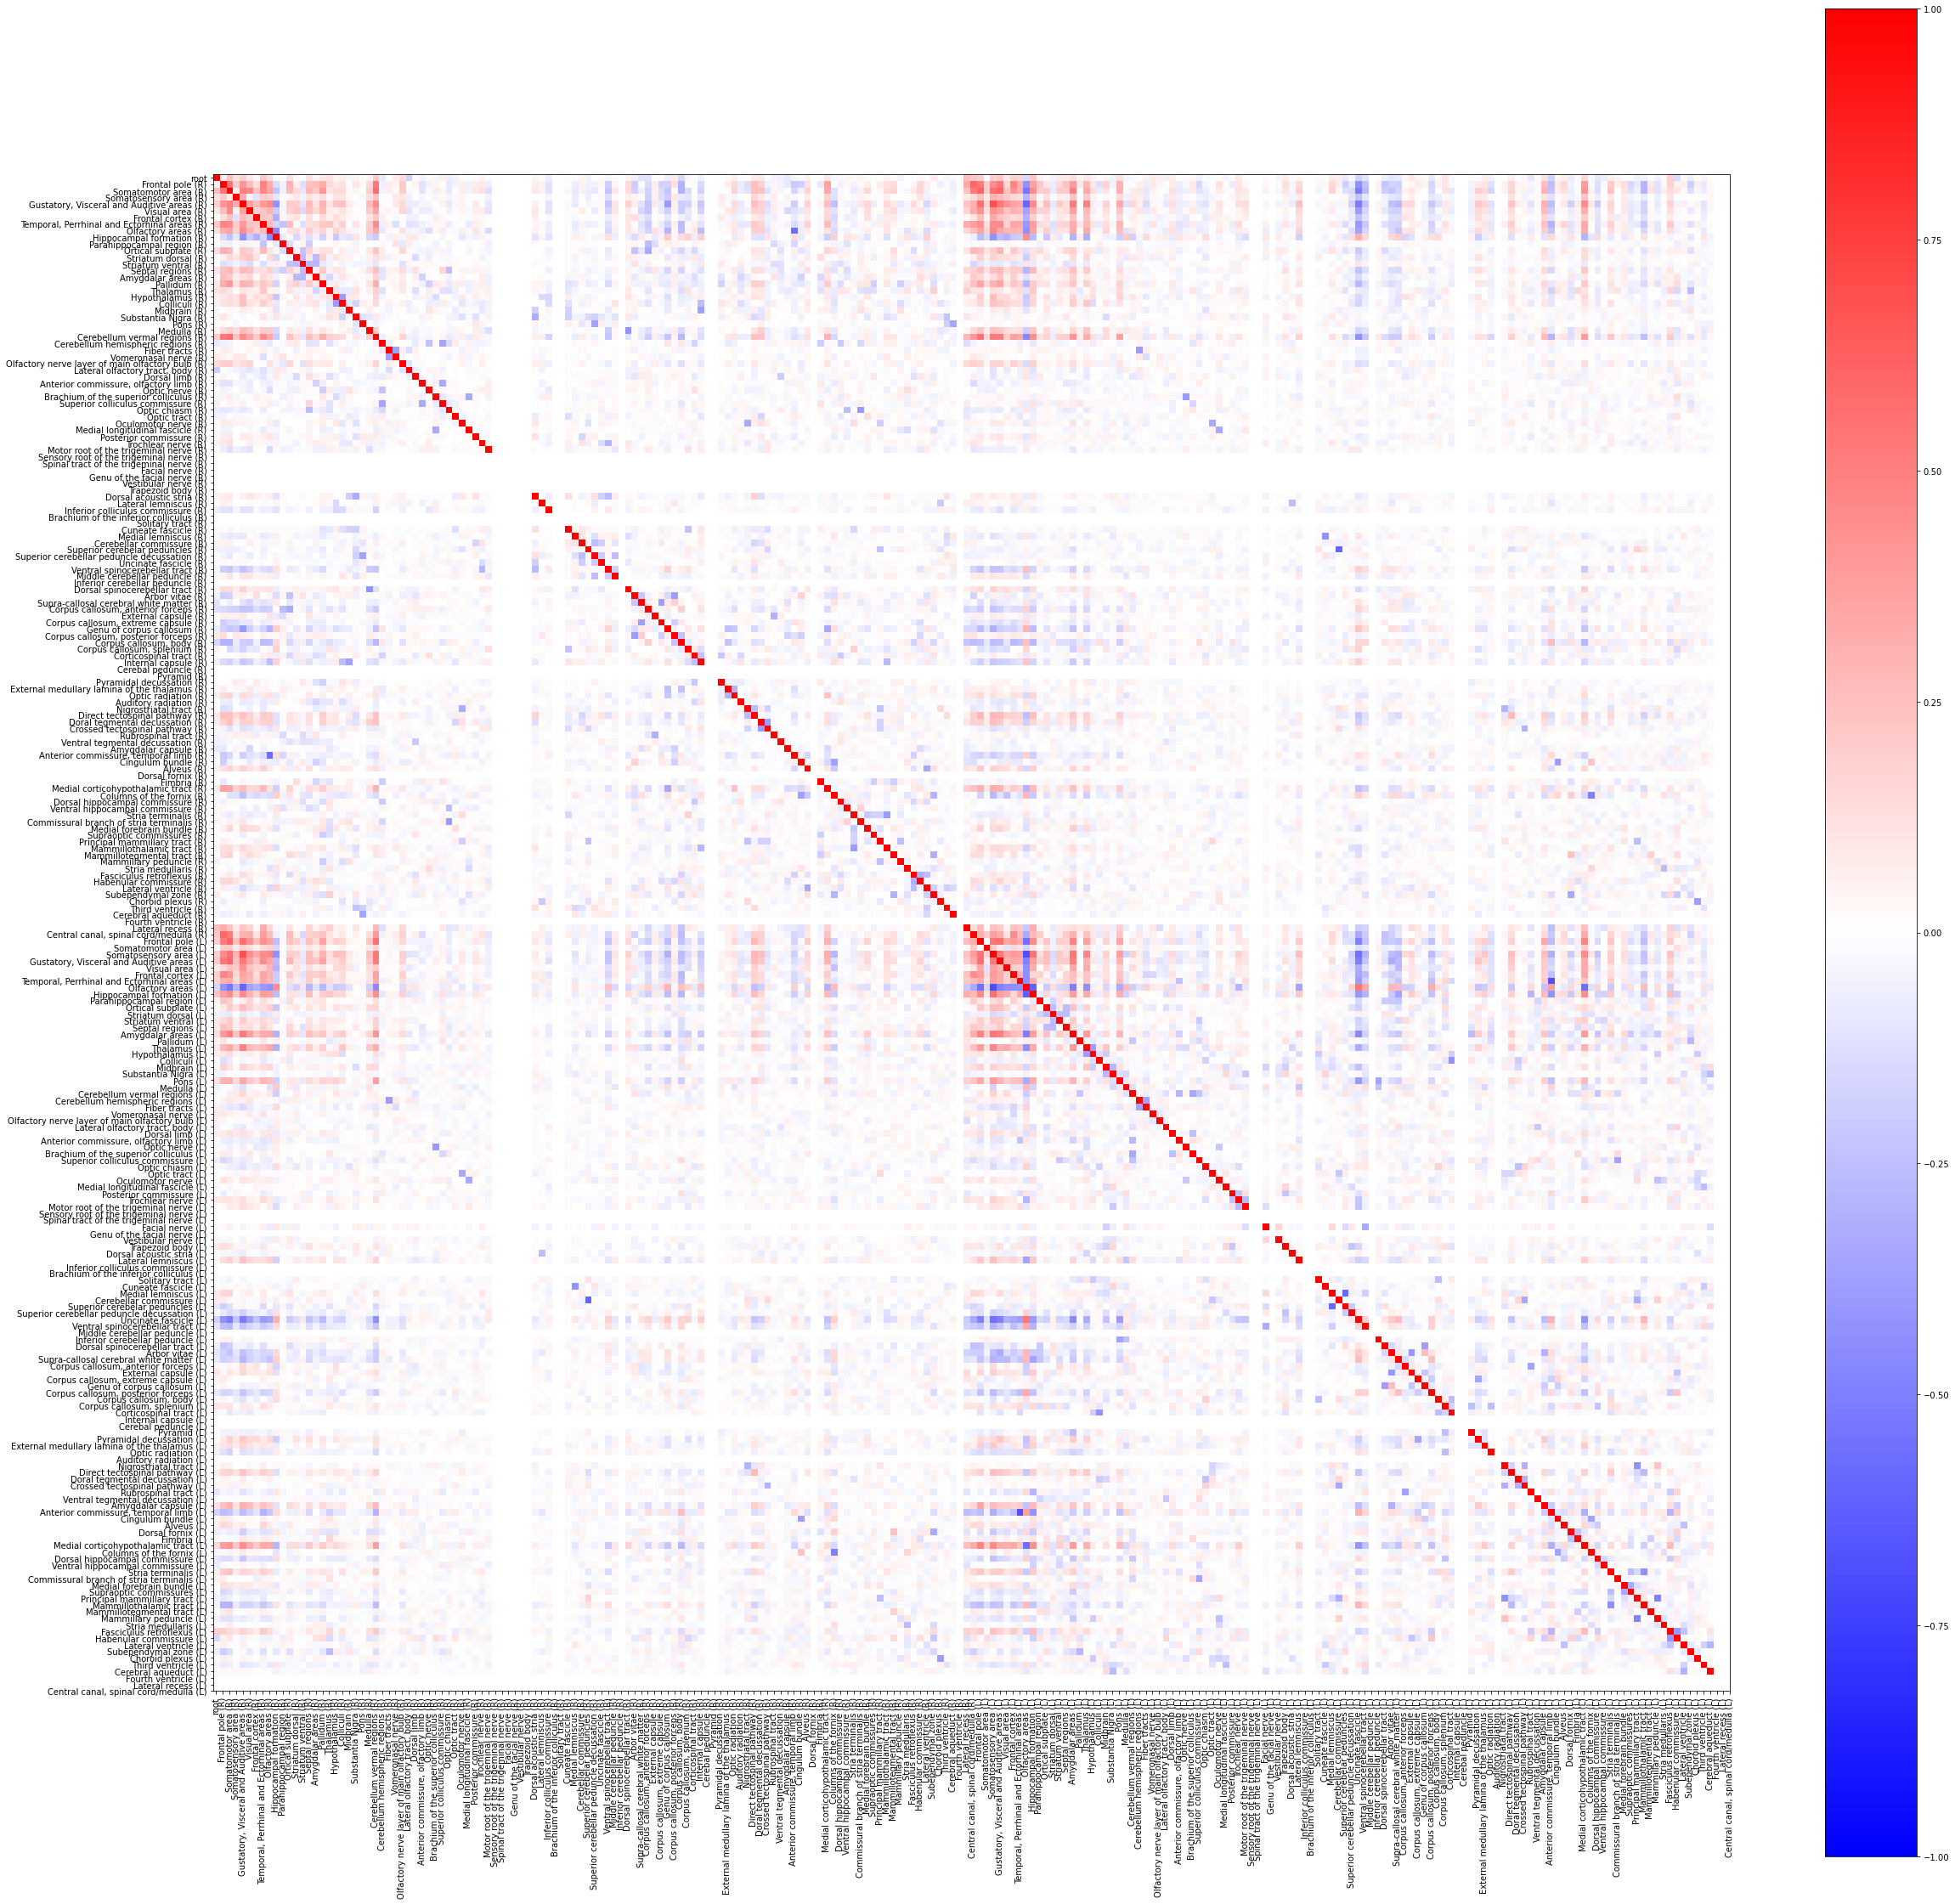

In [56]:
%matplotlib inline
plt.figure(figsize = (40,40))
plt.imshow(cormat, vmin = -1, vmax = 1, cmap = 'bwr')
plt.xticks(np.arange(229),col_two_list, rotation = 90)
plt.yticks(np.arange(229),col_two_list)
plt.colorbar()
plt.savefig("result.pdf")
plt.show()

In [41]:
correlation_dic = {"cormat": cormat}

In [42]:
import scipy.io as scio
scio.savemat("/run/user/1001/gvfs/smb-share:server=sum-gin-nas.u-ga.fr,share=gin_equipe_05/PROJECTS/Share/2022_mouse-rsfMRI/atlasesTemplates/p56_original_smallRegionsGrouped/4dAtlasForConnectivityMatrix/connectivity_matrix_F602_withoutunmixing.mat",correlation_dic)

# Reduced regions

In [66]:
anno4d[0:25,:].shape

(25, 16815)

In [70]:
anno4d_reduced = np.concatenate((anno4d[0:25,:],anno4d[114:139,:]))
anno4d_reduced_bin =  np.where(anno4d_reduced!=0,1,0)

In [74]:
Ainit_red = np.copy(anno4d_reduced_bin)
U = least_sqr(Yinit, Ainit_red, 1e-4)
cormat = np.corrcoef(U.T)

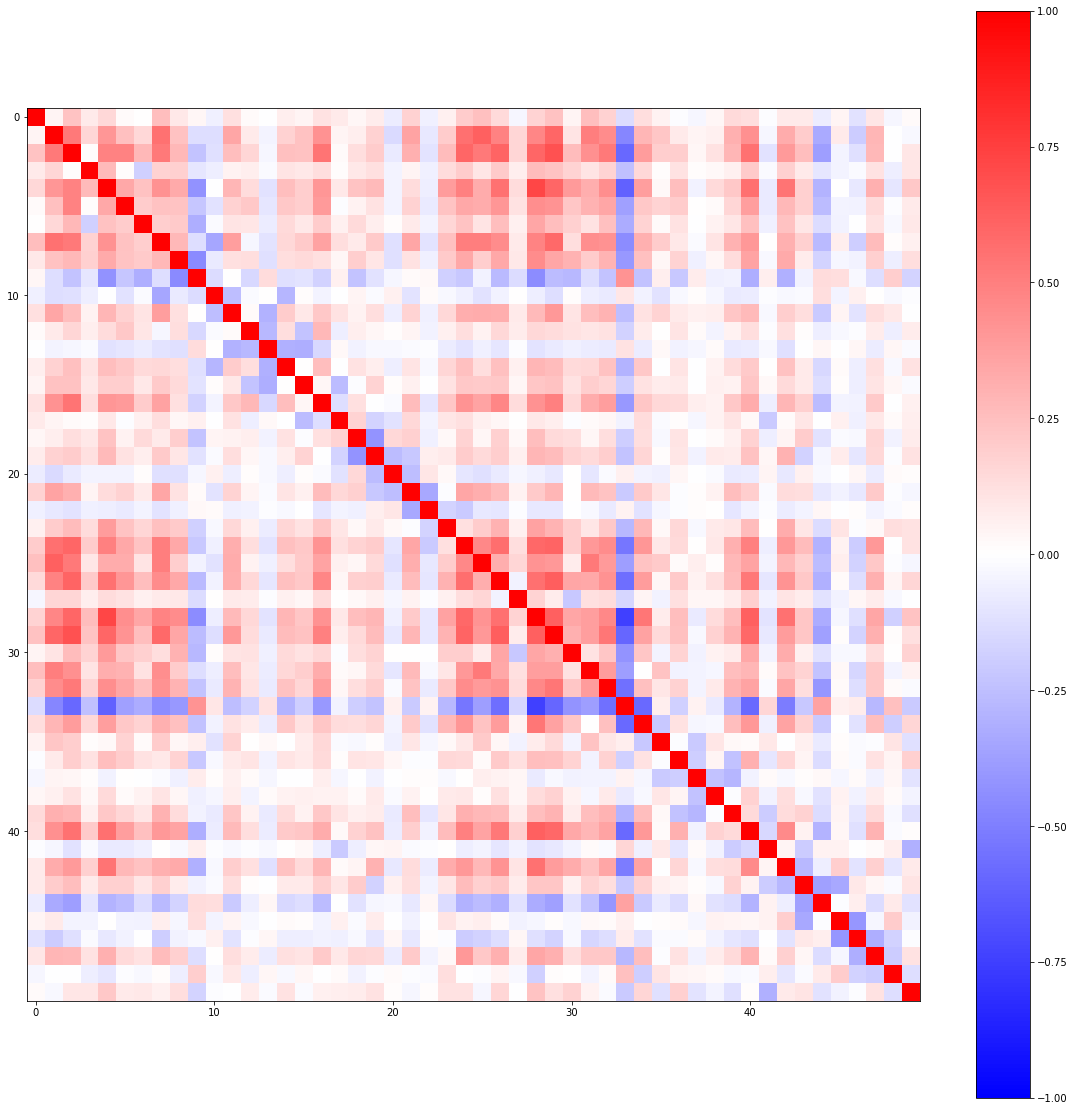

In [75]:
%matplotlib inline
plt.figure(figsize = (20,20))
plt.imshow(cormat, vmin = -1, vmax = 1, cmap = 'bwr')
plt.colorbar()
plt.savefig("result_red.pdf")
plt.show()